# Bibliotecas e Busca de Dados

In [1]:
# !pip install bs4

In [2]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup

In [3]:
# Busca dados
page = requests.get('https://www.agrolink.com.br/cotacoes/historico/sp/feijao-carioca-sc-60kg')
soup = BeautifulSoup(page.text, 'html.parser')

## Transforma Dados

In [4]:
# Cabeçalho da tabela
head = soup.table.find_all('th')
header = [t.getText() for t in head]

In [5]:
# Dados da Tabela
dados = soup.table.find_all('td')
dados = [d.getText() for d in dados]
arr_dados = np.array(dados).reshape(-1,3)

In [6]:
# Transforma em Dataframe
df_dados = pd.DataFrame(arr_dados, columns=header)
df_dados.columns = [c.lower() for c in df_dados.columns]
df_dados = df_dados.set_index('mês/ano')
df_dados.index = pd.to_datetime(df_dados.index, format='%m/%Y')
df_dados = df_dados.sort_index(ascending=True)
df_dados = df_dados.applymap(lambda x: float(x.replace(',','.')))

## Trata Missing Values

In [9]:
# Falta um mês na tabela obtida (missing value)
lack = df_dados.resample('MS').first()
lack.index.difference(df_dados.index)

DatetimeIndex(['2008-03-01'], dtype='datetime64[ns]', name='mês/ano', freq=None)

In [10]:
lack.loc[lack.index.year == 2008]

estadual  nacional
mês/ano                       
2008-01-01  208.3720  217.0125
2008-02-01  227.0000  195.1401
2008-03-01       NaN       NaN
2008-04-01  141.6666  136.3181
2008-05-01  128.8750  123.9477
2008-06-01  132.5000  165.1045
2008-07-01  135.3260  151.0311
2008-08-01  159.5238  143.4250
2008-09-01  174.7727  155.7525
2008-10-01  167.0000  160.6862
2008-11-01   92.2115  103.6513
2008-12-01   84.2424   90.4378

In [11]:
# Preenche o missing value com interpolação
lack = lack.interpolate(method='linear')
lack.loc[lack.index.year == 2008]

estadual  nacional
mês/ano                       
2008-01-01  208.3720  217.0125
2008-02-01  227.0000  195.1401
2008-03-01  184.3333  165.7291
2008-04-01  141.6666  136.3181
2008-05-01  128.8750  123.9477
2008-06-01  132.5000  165.1045
2008-07-01  135.3260  151.0311
2008-08-01  159.5238  143.4250
2008-09-01  174.7727  155.7525
2008-10-01  167.0000  160.6862
2008-11-01   92.2115  103.6513
2008-12-01   84.2424   90.4378

<AxesSubplot:xlabel='mês/ano'>

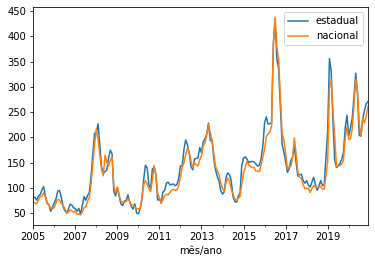

In [14]:
lack.plot()

In [13]:
df_dados = lack

## Salva os Dados

In [15]:
df_dados.to_pickle('../dados/agrolink-feijao.p')